Ahmed Hisham Elsayed

Email: A.HishamElsayed@gmail.com

linkedIn: www.linkedin.com/in/etch-7387

Websit: https://datawins.wuiltsite.com/

Tel: +201096979894

# Task 2 - Binary Classification Problem
 
Given the training and validation datasets, http://bit.ly/widebot-new-binclf-data  , Create and train a machine learning model using the training set that performs well on the validation set. You should decide on the metrics of "performance" yourself, We will assess your decision.
 
It is up to you to use any of the following languages: [Python, Scala, Java, R]. We appreciate a small write up of the observations and your thoughts to follow your thought process.


# Dear Reviewer, please read this road map to make it easy and fast for you to take a quick look. for details read the code and the notes on it.

### Road map (14 points):
1) imported Training data with handling separation.

2) Assessed the data-> consist of 2700 rows & 19 columns
    11 categorical, 4 integers and 4 floats.
    
3) Data Cleaning: there are 3210 duplicates, I dropped them 
   There are missing, I filled some of them by the median, others by the most common records, I dropped a few rows of one        column, and I dropped one column that contained +75% of missings.
 
4) imported Validation data.

5) Assessed the data-> consist of 200 rows & 19 columns.

6) data cleaning -> there are no duplicates
     I handled missing like above.
     
7) cannot take decision of outliers because I don’t have data documentation.


*start modelling

8) handle the Target Variable of 'Training'  & Test with Label Encoding.

9) Handle Categorical features of both Training and validation set with ‘ONE-HOT-ENCODING’.

10) there was a problem(Test and Traning haven’t the same dimension)
       This is why I created extra columns in the Test set and filled it with ‘0’ to make them balanced.
       
11) make Regularization: Apply LASSO to check which variable should be in the model.

12) Start Building the Model using RandomForest Algorithm and score the model by ‘mean_absolute_error’ Then apply Cross-Validation(CV = 5)  and I got Mean Absolute Error = 0.16 which is Acceptable.

13) I tried to # Start building the model by K Nearest Knighbor 'KNN' but after making hyperparameter tuning to choose the 'K' neighbours and applied Cross-validation and scoring with accuracy’ and cleaning the code with Pipeline I got accuracy = 0.62 which is not good, So the RandomForest Algorithm is the best.

14) See the exploratory data analysis here(https://public.tableau.com/profile/ahmed.hisham.el.sayed.mohamed#!/vizhome/WidebotTask2-BinaryClassificationProblem-FinalEdition/Story1?publish=yes)

# 1)importing Training Data

In [1]:
#import pandas
import pandas as pd
#data file path
data_path1 = "E:/Widebot/Task 2/training.csv"
#import the CSV(Train) file
train = pd.read_csv(data_path1, sep =";" , thousands=r',' )

In [2]:
train.head(3)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,1792.0,0.00054,u,g,c,v,175,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,1692.0,0.00335,y,p,k,v,29,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,3125.0,1125.00000,u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.


In [3]:
train.shape

(3700, 19)

# 3)Assessing Training Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null int64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(4), int64(4), object(11)
memory usage: 549.3+ KB


there are 11 categoriacl, 4 integer, 4 floats

In [5]:
train.nunique()

variable1       2
variable2     288
variable3     175
variable4       3
variable5       3
variable6      14
variable7       9
variable8     108
variable9       2
variable10      2
variable11     23
variable12      2
variable13      3
variable14    136
variable15    182
variable17    136
variable18      2
variable19      2
classLabel      2
dtype: int64

# Training Data Cleaning

In [6]:
#check duplicates
check_duplicates = train[train.duplicated()]
check_duplicates

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
490,a,4725.0,0.00075,u,g,q,h,275,t,t,1,f,g,333.0,892,3330000.0,NaN,1,yes.
491,a,3367.0,0.00375,u,g,cc,v,375,f,f,0,f,g,300.0,44,3000000.0,NaN,1,yes.
492,b,45.0,85.00000,u,g,cc,h,14,t,t,1,t,g,88.0,2000,880000.0,t,1,yes.
493,b,3317.0,104.00000,u,g,r,h,65,t,f,0,t,g,164.0,31285,1640000.0,NaN,1,yes.
494,a,25.0,0.00875,u,g,x,h,104,t,f,0,t,g,160.0,5860,1600000.0,f,1,yes.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,1875.0,75.00000,u,g,q,v,271,t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,235.0,0.00090,u,g,q,v,85,t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,3417.0,917.00000,u,g,c,v,45,t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,2783.0,154.00000,u,g,W,v,375,t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


#there are duplicates

###### Handle duplicate 

In [7]:
#drop duplicate if they are
train = train.drop_duplicates()

In [8]:
#check..
check_duplicates = train[train.duplicated()]
check_duplicates

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 19 columns):
variable1     481 non-null object
variable2     481 non-null float64
variable3     490 non-null float64
variable4     486 non-null object
variable5     486 non-null object
variable6     484 non-null object
variable7     484 non-null object
variable8     490 non-null int64
variable9     490 non-null object
variable10    490 non-null object
variable11    490 non-null int64
variable12    490 non-null object
variable13    490 non-null object
variable14    480 non-null float64
variable15    490 non-null int64
variable17    480 non-null float64
variable18    220 non-null object
variable19    490 non-null int64
classLabel    490 non-null object
dtypes: float64(4), int64(4), object(11)
memory usage: 76.6+ KB


In [10]:
dfnodup = train.duplicated(subset=None, keep='first')
dfnodup

0      False
1      False
2      False
3      False
4      False
       ...  
485    False
486    False
487    False
488    False
489    False
Length: 490, dtype: bool

these Variables have missings

variable1     variable2          
variable4     variable5     variable6     
variable7     variable14    variable17
variable18

######  handle missings

In [11]:
#variable1 has 9 nan

In [12]:
#let's check the values
train['variable1'].value_counts(dropna=False)

b      327
a      154
NaN      9
Name: variable1, dtype: int64

In [13]:
#handle missing data in 'variable1', fill it by the most commpon which is 'b'
train['variable1'] = train['variable1'].fillna('b')
#let's check the values
train['variable1'].value_counts(dropna=False)

b    336
a    154
Name: variable1, dtype: int64

In [14]:
#vaariable2

In [15]:
#let's check the values
train['variable2'].value_counts(dropna=False)

NaN       9
2267.0    7
2067.0    6
23.0      5
2358.0    5
         ..
425.0     1
3858.0    1
485.0     1
1758.0    1
5675.0    1
Name: variable2, Length: 289, dtype: int64

In [16]:
#handle missing data in 'num_of_adults', fill it by median
variable2_median = train['variable2'].median()
# Replace all the missing values in the num_of_adults column with the median
train['variable2'] = train['variable2'].fillna(variable2_median)

#let's check the values
train['variable2'].value_counts(dropna=False)

2558.0    10
2267.0     7
2067.0     6
23.0       5
2358.0     5
          ..
3858.0     1
485.0      1
1758.0     1
1692.0     1
5675.0     1
Name: variable2, Length: 288, dtype: int64

In [17]:
#variable4

In [18]:
#let's check the values
train['variable4'].value_counts(dropna=False)

u      370
y      114
NaN      4
l        2
Name: variable4, dtype: int64

In [19]:
#handle missing data in 'variable1', fill it by the most commpon which is 'b'
train['variable4'] = train['variable4'].fillna('u')

In [20]:
#variable 5

In [21]:
#let's check the values
train['variable5'].value_counts(dropna=False)

g      370
p      114
NaN      4
gg       2
Name: variable5, dtype: int64

In [22]:
#handle missing data in 'variable5', fill it by the most commpon which is 'g'
train['variable5'] = train['variable5'].fillna('g')

In [23]:
#variable 6 has 5 nans

In [24]:
#let's check the values
train['variable6'].value_counts(dropna=False)

c      97
q      57
W      48
ff     46
i      41
k      35
aa     30
m      29
cc     28
x      25
d      19
e      17
j       9
NaN     6
r       3
Name: variable6, dtype: int64

In [25]:
#i will not be able to fill nans here, so i will leave it as it is and drop these NAN rows later

In [26]:
#variable 7 

In [27]:
#let's check the values
train['variable7'].value_counts(dropna=False)

v      275
h      100
ff      49
bb      39
j        7
NaN      6
dd       5
z        4
n        3
o        2
Name: variable7, dtype: int64

In [28]:
#handle missing data in 'variable5', fill it by the most commpon which is 'g'
train['variable7'] = train['variable7'].fillna('v')

In [29]:
#variable 14

In [30]:
#let's check the values
train['variable14'].value_counts(dropna=False)

0.0      99
200.0    29
100.0    24
120.0    23
160.0    22
         ..
75.0      1
408.0     1
500.0     1
102.0     1
117.0     1
Name: variable14, Length: 137, dtype: int64

In [31]:
#handle missing data in 'num_of_adults', fill it by median
variable14_median = train['variable14'].median()

# Replace all the missing values in the num_of_adults column with the median
train['variable14'] = train['variable14'].fillna(variable14_median)

In [32]:
#variable 17

In [33]:
#let's check the values
train['variable17'].value_counts(dropna=False)

0.0          99
2000000.0    29
1000000.0    24
1200000.0    23
1600000.0    22
             ..
5000000.0     1
1680000.0     1
3950000.0     1
4080000.0     1
2240000.0     1
Name: variable17, Length: 137, dtype: int64

In [34]:
#handle missing data in 'num_of_adults', fill it by median
variable17_median = train['variable17'].median()

# Replace all the missing values in the num_of_adults column with the median
train['variable17'] = train['variable17'].fillna(variable17_median)

In [35]:
#variable 18

In [36]:
#let's check the values
train['variable18'].value_counts(dropna=False)

NaN    270
f      127
t       93
Name: variable18, dtype: int64

In [37]:
train = train.drop(['variable18'], axis=1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 18 columns):
variable1     490 non-null object
variable2     490 non-null float64
variable3     490 non-null float64
variable4     490 non-null object
variable5     490 non-null object
variable6     484 non-null object
variable7     490 non-null object
variable8     490 non-null int64
variable9     490 non-null object
variable10    490 non-null object
variable11    490 non-null int64
variable12    490 non-null object
variable13    490 non-null object
variable14    490 non-null float64
variable15    490 non-null int64
variable17    490 non-null float64
variable19    490 non-null int64
classLabel    490 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 72.7+ KB


In [39]:
#drop missing values in the dataset
cleaned_train = train.dropna()

In [40]:
cleaned_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,1792.0,0.00054,u,g,c,v,175,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,1692.0,0.00335,y,p,k,v,29,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,3125.0,1125.00000,u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,0,no.
3,a,4817.0,1335.00000,u,g,i,o,335,f,f,0,f,g,0.0,120,0.0,0,no.
4,b,3233.0,35.00000,u,g,k,v,5,f,f,0,t,g,232.0,0,2320000.0,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,a,2267.0,0.00335,u,g,q,v,75,f,f,0,f,s,160.0,0,1600000.0,0,no.
486,b,3483.0,25.00000,y,p,W,v,3,f,f,0,f,s,200.0,0,2000000.0,0,no.
487,a,5575.0,708.00000,u,g,k,h,675,t,t,3,t,g,100.0,50,1000000.0,0,no.
488,b,2217.0,12125.00000,u,g,c,v,3335,f,t,2,t,g,180.0,173,1800000.0,0,no.


In [41]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 489
Data columns (total 18 columns):
variable1     484 non-null object
variable2     484 non-null float64
variable3     484 non-null float64
variable4     484 non-null object
variable5     484 non-null object
variable6     484 non-null object
variable7     484 non-null object
variable8     484 non-null int64
variable9     484 non-null object
variable10    484 non-null object
variable11    484 non-null int64
variable12    484 non-null object
variable13    484 non-null object
variable14    484 non-null float64
variable15    484 non-null int64
variable17    484 non-null float64
variable19    484 non-null int64
classLabel    484 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 71.8+ KB


#data are cleaned now 

In [42]:
#Save cleaned data in Excel file 'cleaned_train.csv'
#cleaned_train.to_csv(r'E:\Widebot\Task 2\cleaned training\cleaned_train.csv', index = False)

# 1)importing Validation Data
 

In [43]:
#import the validation data
data_path2 = "E:/Widebot/Task 2/validation.csv"
validation = pd.read_csv(data_path2 , sep =";" ,  thousands=r',')
validation.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,3233.0,75.00000,u,g,e,bb,1585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,2358.0,179.00000,u,g,c,v,54,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,3642.0,0.00075,y,p,d,v,585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,1842.0,10415.00000,y,p,aa,v,125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,245.0,13335.00000,y,p,aa,v,4,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [44]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
variable1     197 non-null object
variable2     197 non-null float64
variable3     200 non-null float64
variable4     198 non-null object
variable5     198 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     200 non-null int64
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    197 non-null float64
variable15    200 non-null int64
variable17    197 non-null float64
variable18    89 non-null object
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(4), int64(4), object(11)
memory usage: 29.8+ KB


variabl1, variable2, variable4, variable5, variable6, variable7, variable14, variable17, variable18 have missings

# 2) Validation Data Cleaning

In [45]:
#check..
check_duplicates2 = validation[validation.duplicated()]
check_duplicates2

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel


In [46]:
#drop duplicate if they are
validation = validation.drop_duplicates()

###### handle missings

In [47]:
#variable1

In [48]:
#let's check the values
validation['variable1'].value_counts(dropna=False)

b      141
a       56
NaN      3
Name: variable1, dtype: int64

In [49]:
#handle missing data in 'variable1', fill it by the most commpon which is 'b'
validation['variable1'] = validation['variable1'].fillna('b')

In [50]:
#variable2

In [51]:
#let's check the values
validation['variable2'].value_counts(dropna=False)

25.0      4
245.0     3
NaN       3
2042.0    3
2725.0    3
         ..
7483.0    1
1733.0    1
1942.0    1
2292.0    1
3233.0    1
Name: variable2, Length: 161, dtype: int64

In [52]:
#handle missing data in 'num_of_adults', fill it by median
variable2_median = validation['variable2'].median()

# Replace all the missing values in the num_of_adults column with the median
validation['variable2'] = validation['variable2'].fillna(variable2_median)

In [53]:
#variable3

In [54]:
#let's check the values
validation['variable3'].value_counts(dropna=False)

15.00000       8
125.00000      6
0.00075        6
25.00000       5
0.00000        5
              ..
35.00000       1
379.00000      1
129.00000      1
2229.00000     1
11835.00000    1
Name: variable3, Length: 111, dtype: int64

In [55]:
#handle missing data in 'num_of_adults', fill it by median
variable3_median = validation['variable3'].median()

# Replace all the missing values in the num_of_adults column with the median
validation['variable3'] = validation['variable3'].fillna(variable3_median)

In [56]:
#variable4

In [57]:
#let's check the values
validation['variable4'].value_counts(dropna=False)

u      149
y       49
NaN      2
Name: variable4, dtype: int64

In [58]:
#handle missing data in 'variable1', fill it by the most commpon which is 'b'
validation['variable4'] = validation['variable4'].fillna('u')

In [59]:
#variable5

In [60]:
#let's check the values
validation['variable5'].value_counts(dropna=False)

g      149
p       49
NaN      2
Name: variable5, dtype: int64

In [61]:
#handle missing data in 'variable5', fill it by the most commpon which is 'g'
validation['variable5'] = validation['variable5'].fillna('g')

In [62]:
#variable6

In [63]:
#let's check the values
validation['variable6'].value_counts(dropna=False)

c      40
aa     24
q      21
i      18
W      16
k      16
cc     13
x      13
d      11
m       9
e       8
ff      7
NaN     3
j       1
Name: variable6, dtype: int64

In [64]:
#handle missing data in 'variable5', i will not be able to fill nans here, so i will leave it as it is and drop these NANs later

In [65]:
#variable7

In [66]:
#let's check the values
validation['variable7'].value_counts(dropna=False)

v      124
h       38
bb      20
ff       8
z        4
NaN      3
dd       1
j        1
n        1
Name: variable7, dtype: int64

In [67]:
#handle missing data in 'variable5', fill it by the most commpon which is 'g'
validation['variable7'] = validation['variable7'].fillna('v')

In [68]:
#variable14

In [69]:
#let's check the values
validation['variable14'].value_counts(dropna=False)

0.0      33
160.0    12
120.0    12
80.0     10
180.0     8
         ..
70.0      1
99.0      1
410.0     1
253.0     1
420.0     1
Name: variable14, Length: 80, dtype: int64

In [70]:
#handle missing data in 'num_of_adults', fill it by median
variable14_median = validation['variable14'].median()

# Replace all the missing values in the num_of_adults column with the median
validation['variable14'] = validation['variable14'].fillna(variable14_median)

In [71]:
#let's check the values
validation['variable17'].value_counts(dropna=False)

0.0          33
1200000.0    12
1600000.0    12
800000.0     10
600000.0      8
             ..
2200000.0     1
4220000.0     1
4000000.0     1
1290000.0     1
3600000.0     1
Name: variable17, Length: 80, dtype: int64

In [72]:
#handle missing data in 'num_of_adults', fill it by median
variable17_median = validation['variable17'].median()

# Replace all the missing values in the num_of_adults column with the median
validation['variable17'] = validation['variable17'].fillna(variable17_median)

In [73]:
#variable18

In [74]:
#let's check the values
validation = validation.drop(['variable18'], axis=1)

In [75]:
#handle missing data in 'variable5', fill it by the most commpon which is 'g'
#validation['variable18'] = validation['variable18'].fillna('ft')

In [76]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 18 columns):
variable1     200 non-null object
variable2     200 non-null float64
variable3     200 non-null float64
variable4     200 non-null object
variable5     200 non-null object
variable6     197 non-null object
variable7     200 non-null object
variable8     200 non-null int64
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    200 non-null float64
variable15    200 non-null int64
variable17    200 non-null float64
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 29.7+ KB


In [77]:
#drop rows contain missings

In [78]:
cleaned_validation = validation.dropna()

In [79]:
cleaned_validation

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,b,3233.0,75.00000,u,g,e,bb,1585,t,f,0,t,s,420.0,0,4200000.0,1,no.
1,b,2358.0,179.00000,u,g,c,v,54,f,f,0,t,g,136.0,1,1360000.0,0,no.
2,b,3642.0,0.00075,y,p,d,v,585,f,f,0,f,g,240.0,3,2400000.0,1,no.
3,b,1842.0,10415.00000,y,p,aa,v,125,t,f,0,f,g,120.0,375,1200000.0,0,no.
4,b,245.0,13335.00000,y,p,aa,v,4,f,f,0,t,g,120.0,475,1200000.0,1,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,2308.0,115.00000,u,g,i,v,35,t,t,9,f,g,56.0,742,560000.0,0,yes.
196,a,5708.0,195.00000,u,g,c,v,55,t,t,7,f,g,0.0,3000,0.0,1,yes.
197,b,3083.0,0.00000,u,g,W,v,125,t,t,1,f,g,202.0,0,2020000.0,0,yes.
198,b,1967.0,0.00375,u,g,q,v,2,t,t,2,t,g,80.0,0,800000.0,1,yes.


In [80]:
cleaned_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 18 columns):
variable1     197 non-null object
variable2     197 non-null float64
variable3     197 non-null float64
variable4     197 non-null object
variable5     197 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     197 non-null int64
variable9     197 non-null object
variable10    197 non-null object
variable11    197 non-null int64
variable12    197 non-null object
variable13    197 non-null object
variable14    197 non-null float64
variable15    197 non-null int64
variable17    197 non-null float64
variable19    197 non-null int64
classLabel    197 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 29.2+ KB


In [81]:
#Save cleaned data in Excel file 'cleaned_train.csv'
#cleaned_validation.to_csv(r'E:\Widebot\Task 2\cleaned validation\cleaned_validation.csv', index = False)

# Modeling

## handle the Target Variable of 'Training'

In [82]:
#import pandas 
import pandas as pd
#data file path
path = "E:\Widebot\Task 2\cleaned training\cleaned_train.csv"
#import the CSV file
train_model= pd.read_csv(path) 
train_model.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,1792.0,0.00054,u,g,c,v,175,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,1692.0,0.00335,y,p,k,v,29,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,3125.0,1125.00000,u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,0,no.
3,a,4817.0,1335.00000,u,g,i,o,335,f,f,0,f,g,0.0,120,0.0,0,no.
4,b,3233.0,35.00000,u,g,k,v,5,f,f,0,t,g,232.0,0,2320000.0,0,no.


In [83]:
#let's check
train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 18 columns):
variable1     484 non-null object
variable2     484 non-null float64
variable3     484 non-null float64
variable4     484 non-null object
variable5     484 non-null object
variable6     484 non-null object
variable7     484 non-null object
variable8     484 non-null int64
variable9     484 non-null object
variable10    484 non-null object
variable11    484 non-null int64
variable12    484 non-null object
variable13    484 non-null object
variable14    484 non-null float64
variable15    484 non-null int64
variable17    484 non-null float64
variable19    484 non-null int64
classLabel    484 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 68.2+ KB


###### make labelencoding for the target variable

In [84]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_model['classLabel'] = label_encoder.fit_transform(train_model['classLabel'])

In [85]:
#Check
train_model.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,1792.0,0.00054,u,g,c,v,175,f,t,1,t,g,80.0,5,800000.0,0,0
1,b,1692.0,0.00335,y,p,k,v,29,f,f,0,f,s,200.0,0,2000000.0,0,0
2,b,3125.0,1125.00000,u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,0,0
3,a,4817.0,1335.00000,u,g,i,o,335,f,f,0,f,g,0.0,120,0.0,0,0
4,b,3233.0,35.00000,u,g,k,v,5,f,f,0,t,g,232.0,0,2320000.0,0,0


## handle the Target Variable of 'Validation'

In [86]:
#import pandas 
import pandas as pd
#data file path
path2 = "E:\Widebot\Task 2\cleaned validation\cleaned_validation.csv"
#import the CSV file
validation_model= pd.read_csv(path2) 
validation_model.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,b,3233.0,75.00000,u,g,e,bb,1585,t,f,0,t,s,420.0,0,4200000.0,1,no.
1,b,2358.0,179.00000,u,g,c,v,54,f,f,0,t,g,136.0,1,1360000.0,0,no.
2,b,3642.0,0.00075,y,p,d,v,585,f,f,0,f,g,240.0,3,2400000.0,1,no.
3,b,1842.0,10415.00000,y,p,aa,v,125,t,f,0,f,g,120.0,375,1200000.0,0,no.
4,b,245.0,13335.00000,y,p,aa,v,4,f,f,0,t,g,120.0,475,1200000.0,1,no.


###### make labelencoding for the target variable

In [87]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
validation_model['classLabel'] = label_encoder.fit_transform(validation_model['classLabel'])

# Handle Categorical features of both Training and validation set

###### Apply  One-Hot-Encoding

In [88]:
#Label Encoding for object to numeric conversion
X_train = train_model.iloc[:, :-1]
X_train = pd.get_dummies(X_train)

#Label Encoding for object to numeric conversion
X_test = validation_model.iloc[: , :-1]
X_test = pd.get_dummies(X_test)


y_train = train_model.iloc[:, -1]

y_test = validation_model.iloc[: , -1]


In [89]:
#check..
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: classLabel, dtype: int32

In [90]:
X_test.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable7_v,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_s
0,3233.0,75.00000,1585,0,420.0,0,4200000.0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,2358.0,179.00000,54,0,136.0,1,1360000.0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
2,3642.0,0.00075,585,0,240.0,3,2400000.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,1842.0,10415.00000,125,0,120.0,375,1200000.0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,245.0,13335.00000,4,0,120.0,475,1200000.0,1,0,1,...,1,0,1,0,1,0,0,1,1,0


In [91]:
X_train.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,1792.0,0.00054,175,1,80.0,5,800000.0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
1,1692.0,0.00335,29,0,200.0,0,2000000.0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
2,3125.0,1125.00000,0,1,96.0,19,960000.0,0,0,1,...,0,1,0,0,1,1,0,1,0,0
3,4817.0,1335.00000,335,0,0.0,120,0.0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
4,3233.0,35.00000,5,0,232.0,0,2320000.0,0,0,1,...,0,1,0,1,0,0,1,1,0,0


In [92]:
try:
    X_train.columns == X_test.columns
except:
    print('Note that they do not have the same dimention')

Note that they do not have the same dimention


###### fill new columns in X_test with 0 value to Occupy with X_train

In [93]:
col_num = len(X_train.columns)
for i in range (col_num):
    if (X_train.columns[i] in X_test.columns) == 0:
        X_test.insert(i, X_train.columns[i], 0)
        
X_train.sort_index(axis=1, inplace=True)
X_test.sort_index(axis=1, inplace=True)        
variables = X_test.columns

In [94]:
#check..
try:
    X_train.columns == X_test.columns
except:
    print('Note that they do not have the same dimention')

In [95]:
#check
X_train.head()

,variable10_f,variable10_t,variable11,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s,variable14,variable15,...,variable7_ff,variable7_h,variable7_j,variable7_n,variable7_o,variable7_v,variable7_z,variable8,variable9_f,variable9_t
0,0,1,1,0,1,1,0,0,80.0,5,...,0,0,0,0,0,1,0,175,1,0
1,1,0,0,1,0,0,0,1,200.0,0,...,0,0,0,0,0,1,0,29,1,0
2,0,1,1,1,0,1,0,0,96.0,19,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0.0,120,...,0,0,0,0,1,0,0,335,1,0
4,1,0,0,0,1,1,0,0,232.0,0,...,0,0,0,0,0,1,0,5,1,0


In [96]:
#check
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 48 columns):
variable10_f    197 non-null uint8
variable10_t    197 non-null uint8
variable11      197 non-null int64
variable12_f    197 non-null uint8
variable12_t    197 non-null uint8
variable13_g    197 non-null uint8
variable13_p    197 non-null int64
variable13_s    197 non-null uint8
variable14      197 non-null float64
variable15      197 non-null int64
variable17      197 non-null float64
variable19      197 non-null int64
variable1_a     197 non-null uint8
variable1_b     197 non-null uint8
variable2       197 non-null float64
variable3       197 non-null float64
variable4_l     197 non-null int64
variable4_u     197 non-null uint8
variable4_y     197 non-null uint8
variable5_g     197 non-null uint8
variable5_gg    197 non-null int64
variable5_p     197 non-null uint8
variable6_W     197 non-null uint8
variable6_aa    197 non-null uint8
variable6_c     197 non-null uint8
variable6_cc

# Regularization: Apply LASSO to check which variable should be in the model 

In [97]:
#concat features together and labels togeter
frame1 = [X_train, X_test]
frame2 = [y_train, y_test]

X = pd.concat(frame1)
y = pd.concat(frame2)

In [98]:
#apply LASSO
from sklearn.linear_model import Lasso

names = X.columns
lasso = Lasso(alpha = 0.1)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

[-0.00000000e+00  0.00000000e+00  2.56744999e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.31741633e-05 -1.72088320e-08  1.09157814e-01
  0.00000000e+00 -0.00000000e+00  6.86038506e-06  1.90306136e-06
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.97409031e-05 -1.40938016e-01  9.21196891e-16]


In [99]:
from matplotlib import pyplot as plt
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names.values, rotation=60)
plt.margins(0.02)
plt.show()

<Figure size 640x480 with 1 Axes>

In [100]:
#so Selected Variables are
selected = ['variable10_f', 'variable10_t', 'variable11', 'variable12_f', 'variable1_b', 'variable2', 'variable3', 'variable4_l', 'variable4_u', 'variable7_v', 'variable7_z', 'variable8', 'variable9_f',
       'variable9_t']

# Start Building the Model using RandomForest Algorithem

In [101]:
#import few package for building the model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [102]:
#select X_train
X_train = X_train[selected]

In [103]:
#select X_test
X_test = X_test[selected]

In [104]:
#imprt few package for building the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [105]:
# function for comparing different approaches
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=10, max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [106]:
#scoring in Mean ansilute error
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(X_train, X_test, y_train, y_test))

MAE from Approach 3 (One-Hot Encoding):
0.2147208121827411


###### Apply Cross Validation on the Model

In [107]:
model = RandomForestRegressor(n_estimators=10, max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [108]:
#apply CV in KNN Model and score the model by mean_absolute_error
cv_scores = -1 * cross_val_score(model, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(cv_scores)

[0.08905109 0.10147059 0.08308824 0.16323529 0.35441176]


In [109]:
#get the mean of scores of the 5 folds
print(np.mean(cv_scores))

0.15825139544869044


###### so we got from Random forest CV 0.16 Mean Abilute Error

# Start building the model by K Nearest Knighbor 'KNN'

### first:make hyperparameter tuning to choose the 'K' neighbors

In [110]:
# set range
neighbors = np.arange(1, 12)

In [111]:
#set factors
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))   

In [112]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

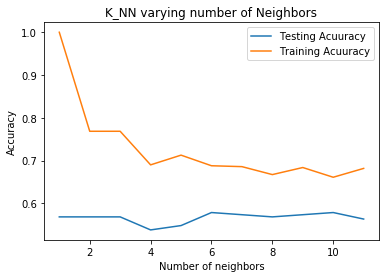

In [113]:
#plot
plt.title('K_NN varying number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Acuuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Acuuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [114]:
# 6 is the best

### second: building the model 

In [115]:
#set n_neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

In [116]:
#fit the Model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Apply Cross Validation

In [117]:
score_dataset
RandomForestRegressor

sklearn.ensemble.forest.RandomForestRegressor

In [118]:
#apply CV in KNN Model and score the model by mean_absolute_error
cv_scores = -1 * cross_val_score(knn, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(cv_scores)

[0.32846715 0.41605839 0.37956204 0.36296296 0.41481481]


In [119]:
#get the mean of scores of the 5 folds
print(np.mean(cv_scores))

0.3803730738037307


###### so we got from KNN 0.38 Mean absolute Error

In [120]:
#apply CV in KNN Model and score the model by Accuracy
cv_scores2 =  cross_val_score(knn, X, y, cv = 5, scoring='accuracy')
print(cv_scores2)

[0.67153285 0.58394161 0.62043796 0.63703704 0.58518519]


In [121]:
#get their mean
print(np.mean(cv_scores2))

0.6196269261962691


### Clean the code using Pipeline technique

In [122]:
# import packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#creat pipeline
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', KNeighborsClassifier(n_neighbors = 3))
                             ])
# fitting
my_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [123]:
# Apply cross validation
cv_scores =  -1 * cross_val_score(my_pipeline, X, y, cv = 10, scoring='neg_mean_squared_error')
print("MSE for 5 folds are:" , cv_scores)
print("Average(MSE of 5 fold) is:", np.mean(cv_scores))
print("RMSE:" , np.mean(np.sqrt(cv_scores)))

MSE for 5 folds are: [0.34782609 0.39130435 0.43478261 0.5        0.38235294 0.45588235
 0.36764706 0.32352941 0.37313433 0.43283582]
Average(MSE of 5 fold) is: 0.40092949574378745
RMSE: 0.6319221204292621


# Extra

# Exploratory Data analysis

In [124]:
#Spearman matrix
corr = cleaned_train.corr()
corr

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19
variable2,1.000000,0.049577,0.084584,0.118123,-0.046082,-0.008792,-0.046082,0.039066
variable3,0.049577,1.000000,0.144606,0.001898,0.001510,-0.037398,0.001510,0.042059
variable8,0.084584,0.144606,1.000000,0.109457,-0.009933,-0.020944,-0.009933,0.170413
variable11,0.118123,0.001898,0.109457,1.000000,-0.135204,0.052511,-0.135204,0.388949
variable14,-0.046082,0.001510,-0.009933,-0.135204,1.000000,0.091876,1.000000,-0.097215
variable15,-0.008792,-0.037398,-0.020944,0.052511,0.091876,1.000000,0.091876,0.183136
variable17,-0.046082,0.001510,-0.009933,-0.135204,1.000000,0.091876,1.000000,-0.097215
variable19,0.039066,0.042059,0.170413,0.388949,-0.097215,0.183136,-0.097215,1.000000


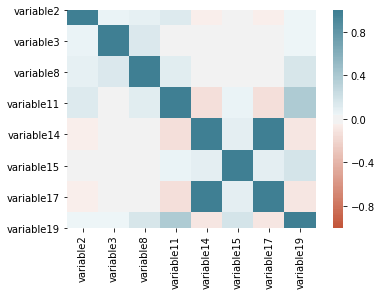

In [125]:
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [126]:
# as shown there is a strong positive Correlation between Variable14 and variable17...etc

## see more details in the Exploratory data analysis at this Tableau link

https://public.tableau.com/profile/ahmed.hisham.el.sayed.mohamed#!/vizhome/WidebotTask2-BinaryClassificationProblem-FinalEdition/Story1?publish=yes